In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [19]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [20]:
len(x_train)

60000

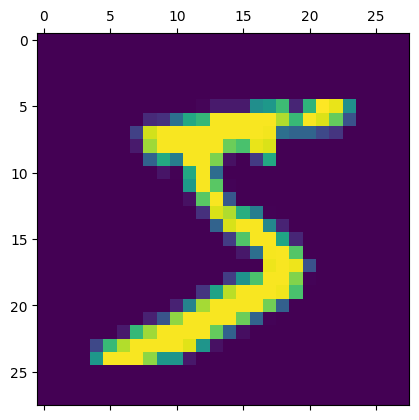

In [21]:
plt.matshow(x_train[0])

In [22]:
y_train[0]

5

In [23]:
x_test[0]
# 2D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [24]:
x_train.shape


(60000, 28, 28)

In [25]:
x_test.shape

(10000, 28, 28)

In [26]:
x_train = x_train/255
x_test = x_test/255
# scaling the value for accuracy

In [27]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)


In [28]:
x_train_flattened[0]
# 1D array for neural network

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
# defining neural network

soham = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

soham.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

soham.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5


C:\Users\Soham Tapse\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - accuracy: 0.8215 - loss: 0.7043
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.9144 - loss: 0.3099
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - accuracy: 0.9224 - loss: 0.2783
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 973us/step - accuracy: 0.9215 - loss: 0.2796
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.9266 - loss: 0.2629


In [30]:
soham.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9139 - loss: 0.3042


[0.2686018943786621, 0.9247000217437744]

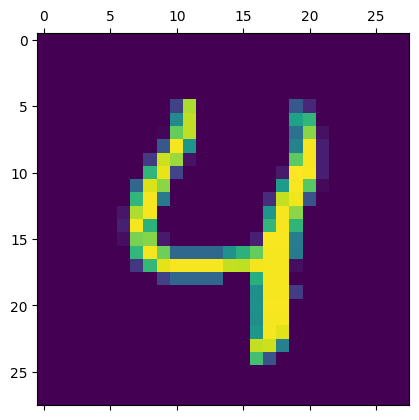

In [37]:
plt.matshow(x_test[4])

In [38]:
y_predicted = soham.predict(x_test_flattened)
output = y_predicted[4]
np.argmax(output)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step


4

In [33]:
y_predicted_lables = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_lables)

Text(95.72222222222221, 0.5, 'Truth')

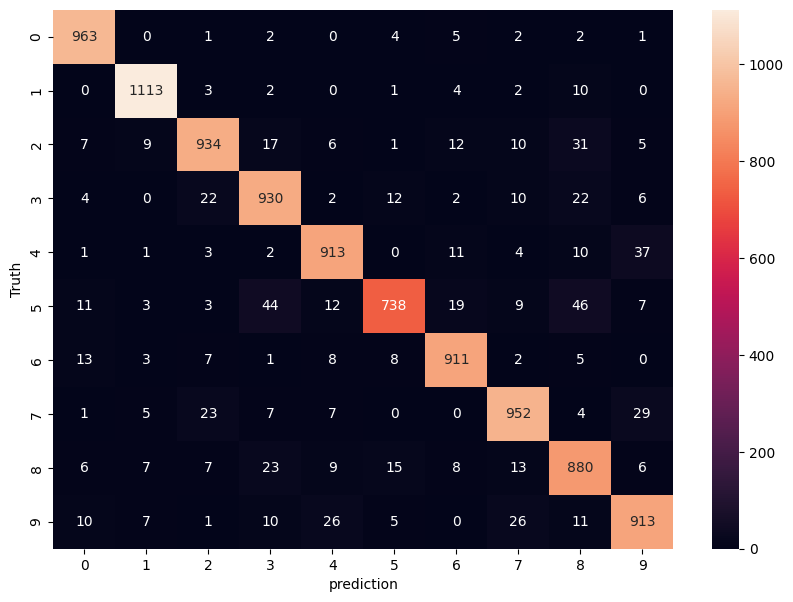

In [36]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('prediction')
plt.ylabel('Truth')